In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import gwdet
from pdet import VT_pop_uniform_q

/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for r

In [3]:
import pycbc.psd
print(*pycbc.psd.get_lalsim_psd_list(), sep='\n')


AdVBNSOptimizedSensitivityP1200087
AdVDesignSensitivityP1200087
AdVEarlyHighSensitivityP1200087
AdVEarlyLowSensitivityP1200087
AdVLateHighSensitivityP1200087
AdVLateLowSensitivityP1200087
AdVMidHighSensitivityP1200087
AdVMidLowSensitivityP1200087
AdVO3LowT1800545
AdVO4IntermediateT1800545
AdVO4T1800545
AdvVirgo
CosmicExplorerP1600143
CosmicExplorerPessimisticP1600143
CosmicExplorerWidebandP1600143
EinsteinTelescopeP1600143
GEO
GEOHF
KAGRA
KAGRA128MpcT1800545
KAGRA25MpcT1800545
KAGRA80MpcT1800545
KAGRADesignSensitivityT1600593
KAGRAEarlySensitivityT1600593
KAGRALateSensitivityT1600593
KAGRAMidSensitivityT1600593
KAGRAOpeningSensitivityT1600593
TAMA
Virgo
aLIGO140MpcT1800545
aLIGO175MpcT1800545
aLIGOAPlusDesignSensitivityT1800042
aLIGOAdVO3LowT1800545
aLIGOAdVO4IntermediateT1800545
aLIGOAdVO4T1800545
aLIGOBHBH20Deg
aLIGOBHBH20DegGWINC
aLIGOBNSOptimizedSensitivityP1200087
aLIGODesignSensitivityP1200087
aLIGODesignSensitivityT1800044
aLIGOEarlyHighSensitivityP1200087
aLIGOEarlyLowSensitivi

In [4]:
m1_min, m1_max, m1_len = 1, 100, 100
q = 0.5 # m2 / m1, with m2 <= m1. Below q = 0.3 plots become a bit messy
z_min, z_max, z_len = 1e-4, 2.2, 50
m1 = np.linspace(1, 100, m1_len)
m2 = m1 * q
z = np.linspace(1e-4, 2.2, z_len)

In [5]:
p = gwdet.detectability()

In [6]:
# with open('data/18213_ET10kmcolumns.txt', 'r') as file:
#     new_lines = []
#     while True:
#         line = file.readline()
#         if line == '':
#             break
#         else:
#             line = line.split(' ')
#             new_lines.append(line[0] + ' ' + line[3])

# with open('data/ET_ASD_file.txt', 'x') as file:
#     file.writelines(new_lines)

In [7]:
with open('data/ET_ASD_file.txt', 'r') as file:
    lines = file.readlines()

f = np.zeros(len(lines))
for i, line in enumerate(lines):
    f[i] = float(line.split(' ')[0])

delta_f = f[1:] - f[:-1]

In [8]:
np.min(delta_f)

np.float64(0.0030758579429499555)

In [ ]:
p = gwdet.detectability(directory='data/', psd_from_path=True, psd_path='data/ET_ASD_file.txt', is_asd_file=True,
                        flow=1., deltaf=1 / 40, snrthreshold=8., massmin=1, massmax=200, zmin=1e-4, zmax=2.2)

In [10]:
p_det = np.zeros((z_len, m1_len))

for i, _z in enumerate(z):
    p_det[i] = p(m1, m2, np.zeros(m1_len) + _z)

In [11]:
np.sum(p_det < 0)

np.int64(0)

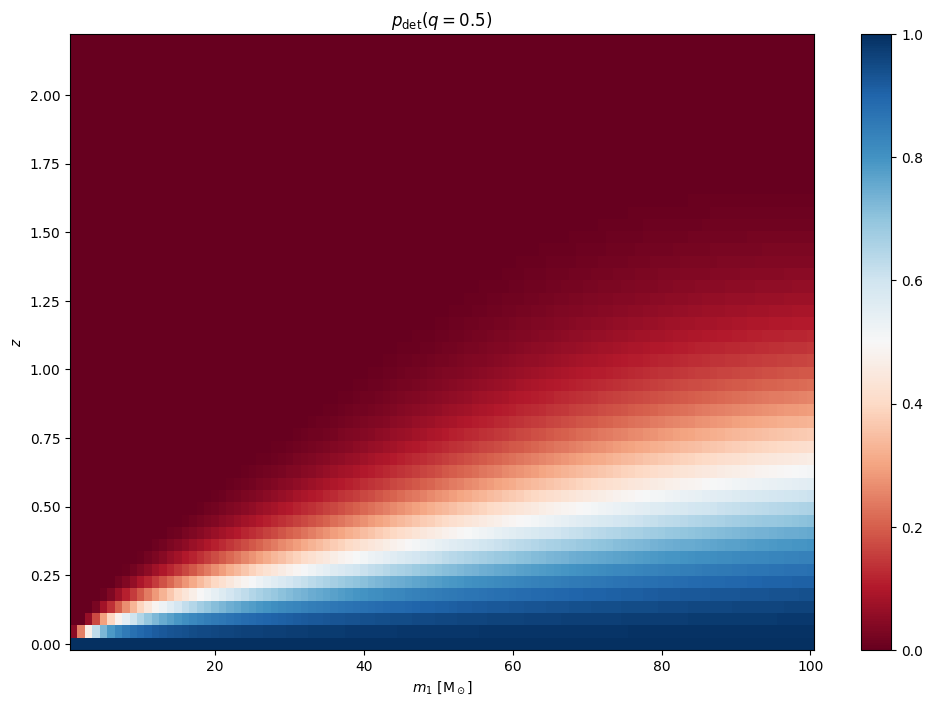

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title(r'$p_\text{{det}} (q = {0})$'.format(q))
ax.set_xlabel(r'$m_1\ [\text{M}_\odot$]')
ax.set_ylabel(r'$z$')

cmap = plt.colormaps['RdBu']
im = ax.pcolormesh(m1, z, p_det, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))

fig.colorbar(im, ax=ax)

plt.show()

In [13]:
if __name__ == '__main__':
    VT = VT_pop_uniform_q(1, z, m1, q)

Computing VT for each (m, z) pair for a uniformly distributed population of sources with fixed q = 0.5:   0%|          | 0/4851 [00:00<?, ?it/s]/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.ve

In [14]:
np.sum(VT < 0)

np.int64(1)

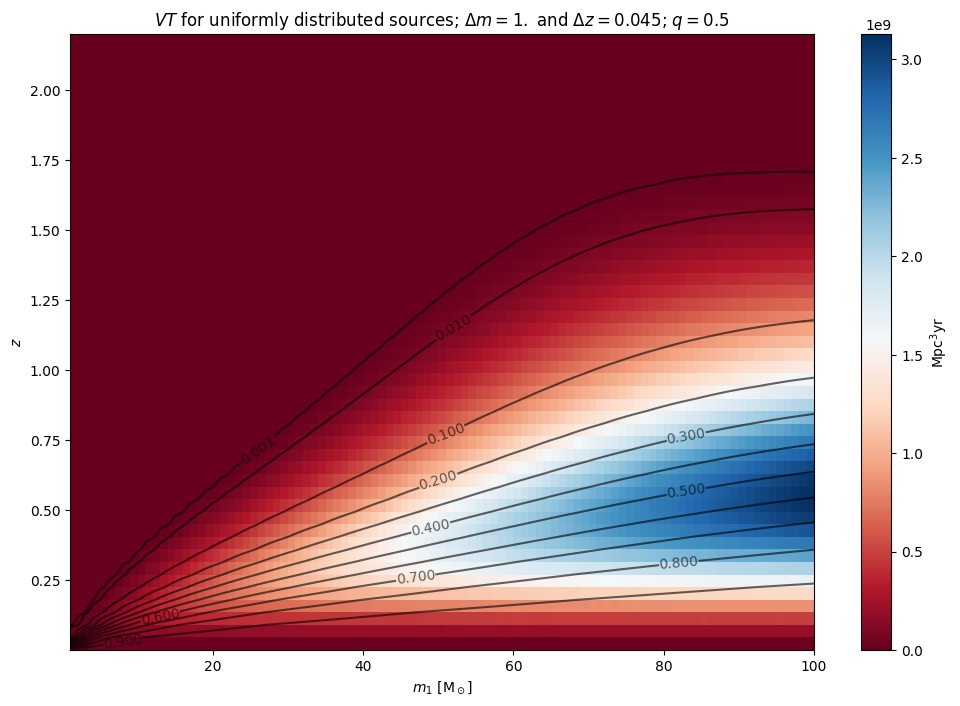

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title(r'$VT$ for uniformly distributed sources; $\Delta m = {0}$ and $\Delta z = {1}$; $q = {2}$'.format(np.format_float_positional((m1_max - m1_min) / (m1_len - 1), 3),
                                                                                                                np.format_float_positional((z_max - z_min) / (z_len - 1), 3),
                                                                                                                np.format_float_positional(q, 3)))
ax.set_xlabel(r'$m_1\ [\text{M}_\odot$]')
ax.set_ylabel(r'$z$')

cmap = plt.colormaps['RdBu']
im = ax.pcolormesh(m1, z, VT, cmap=cmap, norm=mpl.colors.Normalize(vmin=np.min(VT), vmax=np.max(VT)))

levels = [1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
cf = ax.contour(m1, z, p_det, levels=levels, colors='black', alpha=0.6)
ax.clabel(cf)

cbar = fig.colorbar(im, ax=ax, label=r'$\text{Mpc}^3 \text{yr}$')

plt.show()

/var/folders/05/2fbv44555hx420qclxnfbd4c0000gn/T/ipykernel_99567/3420535131.py:8: RuntimeWarning: divide by zero encountered in divide
  VT_ratio_map = target_VT / VT


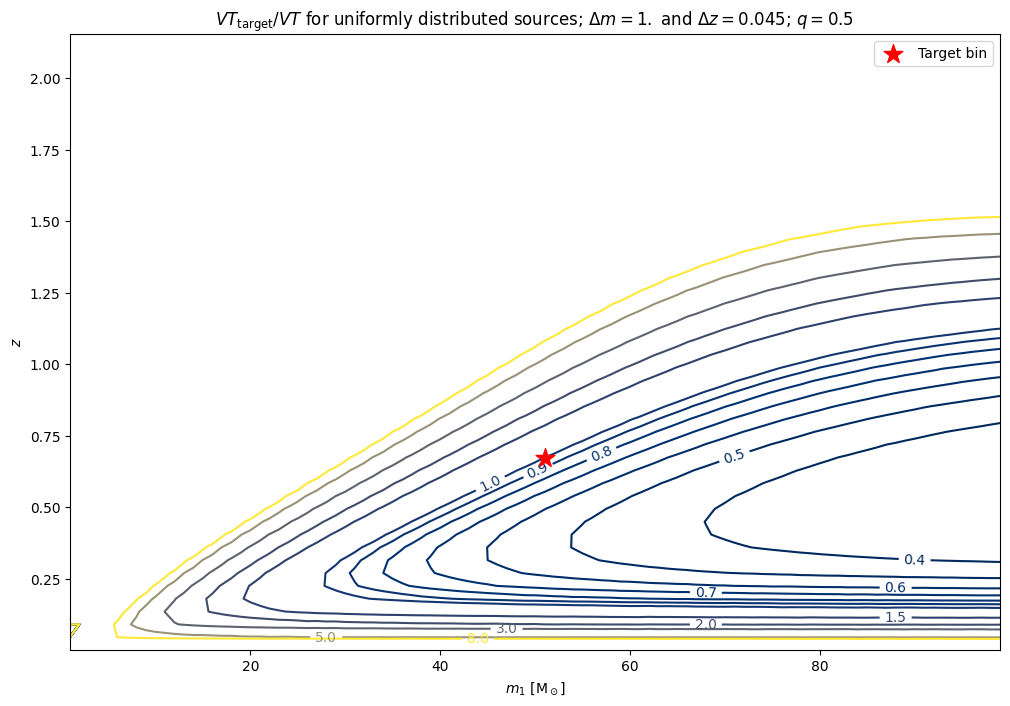

In [16]:
# # Define the target bin using its relative position in the grid
# rx, ry = 0.5, 0.3
# target_bin = (int(rx * (VT.T.shape[0] - 1)), int(ry * (VT.T.shape[1] - 1)))

target_bin = (50, 15)

target_VT = VT.T[*target_bin]
VT_ratio_map = target_VT / VT

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title(r'${{VT}}_\text{{target}} / VT$ for uniformly distributed sources; $\Delta m = {0}$ and $\Delta z = {1}$; $q = {2}$'.format(np.format_float_positional((m1_max - m1_min) / (m1_len - 1), 3),
                                                                                                                                         np.format_float_positional((z_max - z_min) / (z_len - 1), 3),
                                                                                                                                         np.format_float_positional(q, 3)))
ax.set_xlabel(r'$m_1\ [\text{M}_\odot$]')
ax.set_ylabel(r'$z$')

cmap = plt.colormaps['cividis']
levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2, 3, 5, 8]

cf = ax.contour(m1[:-1], z[:-1], VT_ratio_map, levels=levels, cmap=cmap)
ax.clabel(cf)

ax.scatter(m1[target_bin[0]], z[target_bin[1]], color='red', marker='*', s=200, zorder=100, label='Target bin')

ax.legend()

plt.show()